In [1]:
import pandas as pd
import numpy as np

# Dataset preparation and split

In [2]:
df_train = pd.read_csv('dataset/avila-tr.txt', header=None)
target_train = df_train[10]
target_train.replace({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 
    'G': 7, 'H': 8, 'I': 9, 'W': 10, 'X': 11, 'Y': 12}, inplace=True)
df_train.drop(columns=10, inplace=True)

In [3]:
df_test = pd.read_csv('dataset/avila-ts.txt', header=None)
target_test = df_test[10]
target_test.replace({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 
    'G': 7, 'H': 8, 'I': 9, 'W': 10, 'X': 11, 'Y': 12}, inplace=True)
df_test.drop(columns=10, inplace=True)

In [4]:
x_train, y_train, x_test, y_test = df_train, target_train, df_test, target_test  

# Model importation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [10]:
base_models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis()
}

# Model ranking

Train 10 models on the dataset, predict and get metric (MSE) to get best models.

In [12]:
mse_scores = []

for name, model in base_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append((name, mse))

C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Sort models with the metric to rank them.

In [40]:
mse_scores.sort(key=lambda x: x[1])
print('Model ranking without optimized hyperparameter :')
for i, (model, error) in enumerate(mse_scores):
    print(f'{i+1}. {model} - MSE : {error:.3f}')

Classement initial des modèles :
1. RandomForestClassifier - MSE : 0.467
2. DecisionTreeClassifier - MSE : 0.744
3. GradientBoostingClassifier - MSE : 1.124
4. MLPClassifier - MSE : 4.671
5. KNeighborsClassifier - MSE : 5.897
6. SVC - MSE : 7.888
7. LogisticRegression - MSE : 10.972
8. LinearDiscriminantAnalysis - MSE : 13.759
9. GaussianNB - MSE : 17.253
10. AdaBoostClassifier - MSE : 19.242


# GridSearch

In [44]:
param_grid = {
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'RandomForestClassifier': {
        'n_estimators': [10, 100, 200],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 1.0],
        'max_depth': [3, 4, 5]
    }
}

models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

Launch the GridSearch on the 3 best models to get the best hyperparameter for each. We only launch on the 3 best because it takes a lot of times (~2 hours).

In [45]:
best_models = {}
mse_scores = []

for name, model in models.items():
    print(f'Trying to find best hyperparameter for {name}...')
    grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=8, scoring='neg_mean_squared_error', verbose=0)
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_

    y_pred = best_models[name].predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append((name, mse))


Evaluation des meilleurs paramètres pour DecisionTreeClassifier
Evaluation des meilleurs paramètres pour RandomForestClassifier


C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1282 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Pyth

Evaluation des meilleurs paramètres pour GradientBoostingClassifier


Display the best hyperparameter for each models

In [46]:
print('Best hyperparameter found with GridSearch :')
for model, best_param in best_models.items():
    print(f'{model} : {best_param}')

Meilleurs hyperparamètres obtenu grâce au GridSearch :
DecisionTreeClassifier : DecisionTreeClassifier(criterion='entropy', max_depth=40)
RandomForestClassifier : RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=200)
GradientBoostingClassifier : GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200)


# Model ranking with GridSearch

Rank models using the MSE

In [47]:
mse_scores.sort(key=lambda x: x[1])
print('Model ranking with optimized hyperparameter :')
for i, (model, error) in enumerate(mse_scores):
    print(f'{i+1}. {model} - MSE : {error:.3f}')

Classement des meilleurs modèles :
1. GradientBoostingClassifier - MSE : 0.092
2. RandomForestClassifier - MSE : 0.279
3. DecisionTreeClassifier - MSE : 0.419


# Model performance figures

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
confusion_matrix_scores = []
data = {'Name': [], 'Score': [], 'Metric': []}

for name, model in base_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    data['Name'].extend([name, name])
    data['Score'].extend([
        mean_squared_error(y_test, y_pred), 
        accuracy_score(y_test, y_pred)
    ])
    data['Metric'].extend(['MSE', 'Accuracy'])
    
    confusion_matrix_scores.append((name, confusion_matrix(y_test, y_pred)))


C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
metric_data = pd.DataFrame(data)

## Accuracy and MSE

C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

[Text(0, 0, 'LogisticRegression'),
 Text(1, 0, 'KNeighborsClassifier'),
 Text(2, 0, 'SVC'),
 Text(3, 0, 'DecisionTreeClassifier'),
 Text(4, 0, 'RandomForestClassifier'),
 Text(5, 0, 'GradientBoostingClassifier'),
 Text(6, 0, 'AdaBoostClassifier'),
 Text(7, 0, 'GaussianNB'),
 Text(8, 0, 'MLPClassifier'),
 Text(9, 0, 'LinearDiscriminantAnalysis')]

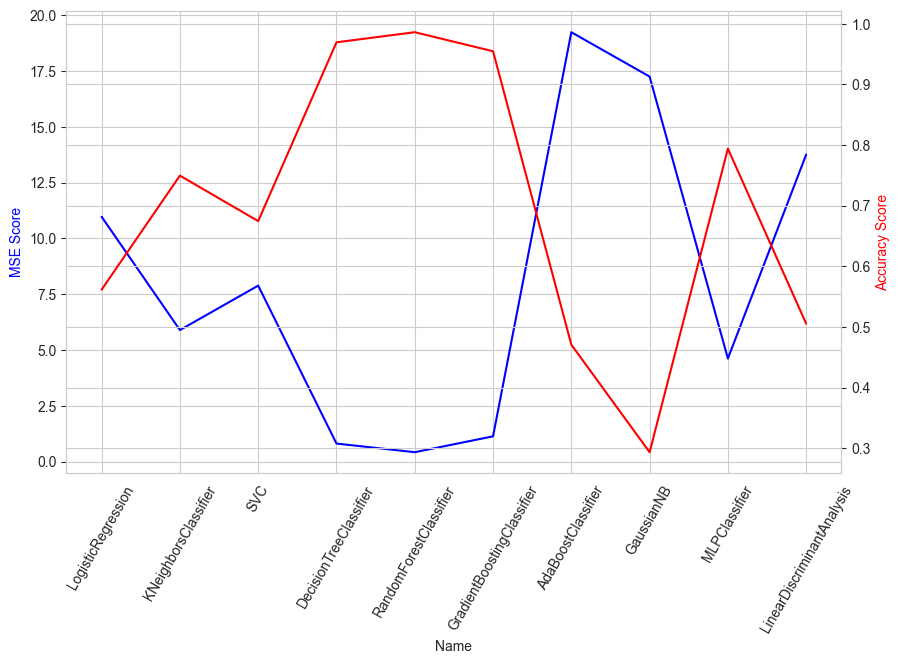

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 6))
plot = sns.lineplot(data=metric_data[metric_data['Metric'] == 'MSE'], x="Name", y="Score", color="blue")
ax2 = plt.twinx()
sns.lineplot(data=metric_data[metric_data['Metric'] == 'Accuracy'], x="Name", y="Score", color="red", ax=ax2)
ax1.set_ylabel('MSE Score', color='blue')
ax2.set_ylabel('Accuracy Score', color='red')
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

## Confusion Matrix

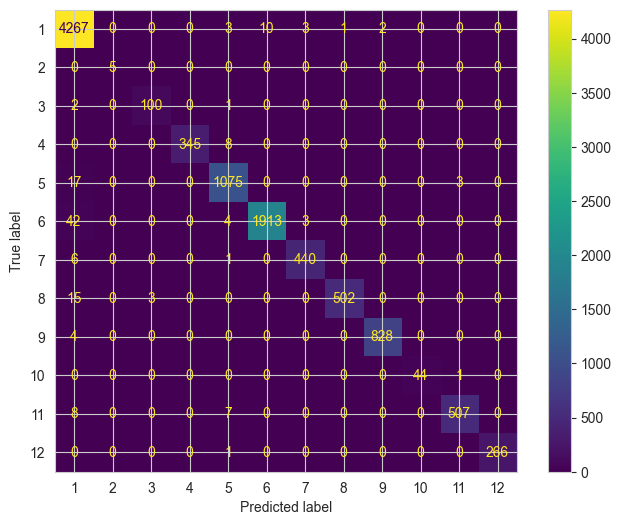

In [43]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix_scores[4][1], display_labels=model.classes_)
display.plot(ax=ax)

## Get Metrics of best models

In [44]:
models_base = {
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', max_depth=40),
    'RandomForestClassifier': RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=200),
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200)
}

In [45]:
confusion_matrix_scores = []
data_best = {'Name': [], 'Score': [], 'Metric': []}

for name, model in models_base.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    data_best['Name'].extend([name, name])
    data_best['Score'].extend([
        mean_squared_error(y_test, y_pred), 
        accuracy_score(y_test, y_pred)
    ])
    data_best['Metric'].extend(['MSE', 'Accuracy'])
    
    confusion_matrix_scores.append((name, confusion_matrix(y_test, y_pred)))

In [46]:
metric_data_best = pd.DataFrame(data_best)

## Accuracy and MSE of best models

C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

[Text(0, 0, 'DecisionTreeClassifier'),
 Text(1, 0, 'RandomForestClassifier'),
 Text(2, 0, 'GradientBoostingClassifier')]

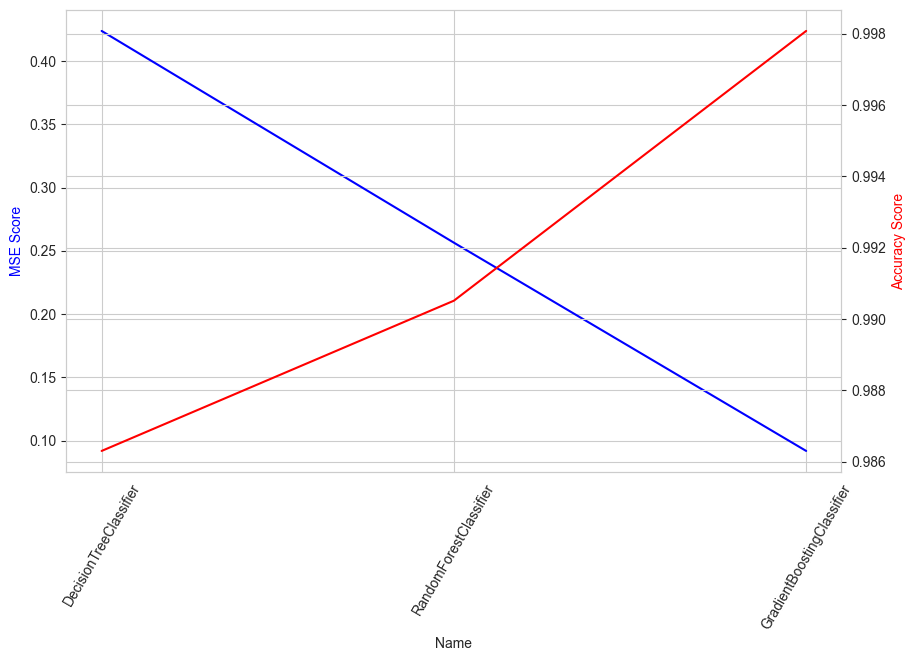

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 6))
plot = sns.lineplot(data=metric_data_best[metric_data_best['Metric'] == 'MSE'], x="Name", y="Score", color="blue")
ax2 = plt.twinx()
sns.lineplot(data=metric_data_best[metric_data_best['Metric'] == 'Accuracy'], x="Name", y="Score", color="red", ax=ax2)
ax1.set_ylabel('MSE Score', color='blue')
ax2.set_ylabel('Accuracy Score', color='red')
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

## Confusion Matrix of Decision Tree Classifier

DecisionTreeClassifier


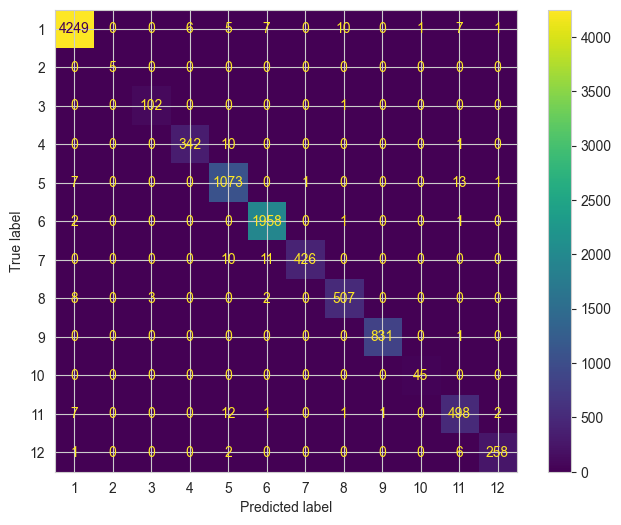

In [50]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix_scores[0][1], display_labels=model.classes_)
display.plot(ax=ax)
print(confusion_matrix_scores[0][0])

## Confusion Matrix of Random Forest Classifier

RandomForestClassifier


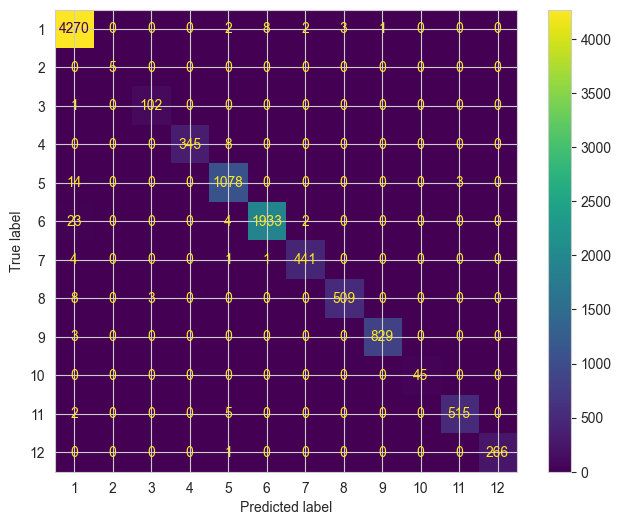

In [51]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix_scores[1][1], display_labels=model.classes_)
display.plot(ax=ax)
print(confusion_matrix_scores[1][0])

## Confusion Matrix of Gradient Boosting Classifier

GradientBoostingClassifier


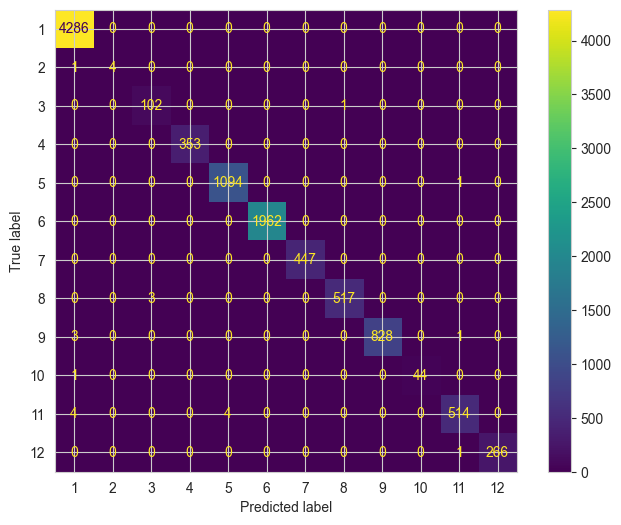

In [52]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(confusion_matrix_scores[2][1], display_labels=model.classes_)
display.plot(ax=ax)
print(confusion_matrix_scores[2][0])

## Combination and comparaison of the best Gradient Boosting with the unoptimized one

In [56]:
gradient = metric_data[metric_data['Name'] == 'GradientBoostingClassifier']
gradient_best = metric_data_best[metric_data_best['Name'] == 'GradientBoostingClassifier']

In [59]:
gradient_best['Name'] = 'Best - ' + gradient_best['Name']

C:\Users\Gabriel TICOLAT\AppData\Local\Temp\ipykernel_21776\3667321825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradient_best['Name'] = 'Best - ' + gradient_best['Name']


In [61]:
gradiant_compare = pd.concat([gradient, gradient_best])

C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Name', ylabel='Score'>

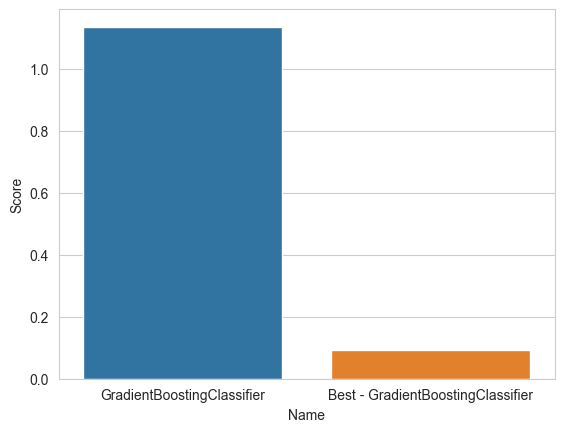

In [63]:
sns.barplot(gradiant_compare[gradiant_compare['Metric'] == 'MSE'], x="Name", y="Score")

C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel TICOLAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Name', ylabel='Score'>

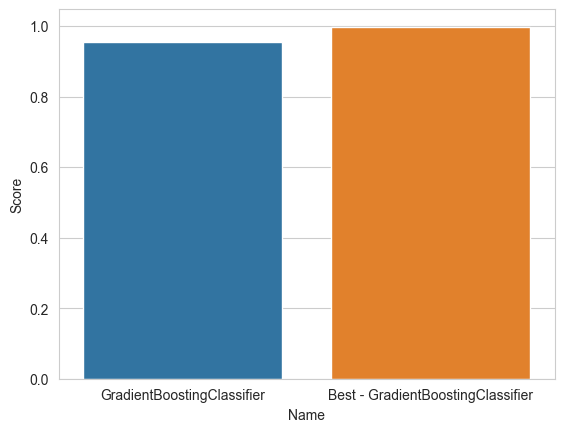

In [64]:
sns.barplot(gradiant_compare[gradiant_compare['Metric'] == 'Accuracy'], x="Name", y="Score")